## Poverty Level Prediction for Households in Costa Rica

### Overview
1. Load the data and get a first impression
2. Explore the data
3. Process the data
4. Modeling
5. Submission

## 1. Load the data and get a first impression

In [1]:
# import libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# load training and test sets

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
# check out the shape of the training and the test set

print('Training set dimensions: ', train.shape)
print('Test set dimensions: ', test.shape)

Training set dimensions:  (9557, 143)
Test set dimensions:  (23856, 142)


In [4]:
# check out basic information on the training set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
# check out basic information on the test set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [6]:
# glimpse at the training set

pd.set_option('display.max_columns', train.shape[1])
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [7]:
# glimpse at the test set

test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [8]:
# check out a summary of the numerical features of the training set

train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [9]:
# check out a summary of the numerical features of the test set

test.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,4203.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,1.980508,0.389168,1.656522,2.045691,0.805709,3.220490,4.026199,4.021756,4.140426,7.214914,0.425172,4.021756,0.588741,0.077171,0.201375,0.008300,0.107017,0.014462,0.001677,0.001258,0.692740,0.234029,0.001761,0.000126,0.013456,0.057889,0.971538,0.018989,0.002138,0.001425,0.669559,0.962274,0.032487,0.005240,0.879527,0.000503,0.003856,0.114940,0.003647,0.225394,0.753060,0.016055,0.001844,0.002222,0.476861,0.476903,0.044014,0.875419,0.034708,0.086058,0.001677,0.000168,0.001970,0.111460,0.322938,0.565602,0.127222,0.307596,0.565183,0.102490,0.270540,0.62697,0.056757,0.490401,0.509599,0.137827,0.123198,0.273265,0.035924,0.058811,0.033409,0.337567,0.307428,0.187500,0.384809,0.013665,0.008426,0.049212,0.009809,0.003228,0.012617,0.002767,0.012701,0.007839,1.412559,2.609197,0.295146,4.0

## 2. Explore the data

In [11]:
# import viszualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

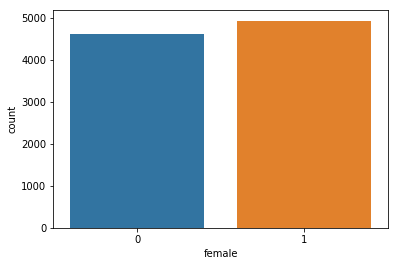

In [12]:
# count plot of the 'female' column to see the distribution of gender in the data

sns.countplot(train['female'])
plt.show()

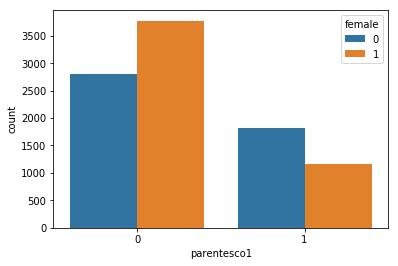

In [13]:
# count plot of the 'parentsco1' column separated by the 'female' column to see the distribution of heads and non-heads of households separated by gender

sns.countplot(train['parentesco1'], hue=train['female'])
plt.show()

In [14]:
# checkout summary statistics of the target

train.describe().Target

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64

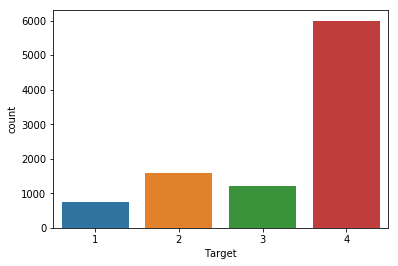

In [15]:
# count plot of the target

sns.countplot(train['Target'])
plt.show()

## 3. Process the data

In [16]:
# map yes to 1 and no to 0 for 'dependency', 'edjefa' and 'edjefe' columns respectively and assess correct mapping

mapping = {'yes': 1, 'no': 0}

for df in [train, test]:
    df['dependency'] = df['dependency'].map(mapping).fillna(df['dependency']).astype(np.float64)
    df['edjefa'] = df['edjefa'].map(mapping).fillna(df['edjefa']).astype(np.float64)
    df['edjefe'] = df['edjefe'].map(mapping).fillna(df['edjefe']).astype(np.float64)
    
train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [17]:
# unique households

all_households = list(train['idhogar'].unique())

print(len(all_households))
print(len(set(all_households)))

2988
2988


In [18]:
# unique households with head

households_with_heads = list(train[train['parentesco1'] == 1]['idhogar'])

print(len(households_with_heads))
print(len(set(households_with_heads)))

2973
2973


In [19]:
# unique households without head

households_without_head = [element for element in all_households if not element in households_with_heads]

print(len(households_without_head))
print(len(set(households_without_head)))

15
15


In [20]:
# ensure that every household member has the same target value as the head of household

target_household_without_head = train.loc[train['idhogar'].isin(households_without_head)][['idhogar', 'Target']]
true_target_household = train[train['parentesco1'] == 1][['idhogar','Target']]

train = train.drop('Target', axis=1)
train = pd.merge(train, true_target_household, how='left', on=['idhogar'])

mapping_target_households_without_head = dict(zip(target_household_without_head.idhogar, target_household_without_head.Target))
train['Target'] = train['idhogar'].map(mapping_target_households_without_head).fillna(train['Target']).astype(np.float64)

train['Target'] = train['Target'].astype(np.int64)

In [21]:
# combine train and test set into one dataframe for easier manipulation

test['Target'] = np.nan
train_test = train.append(test, ignore_index=True)

In [22]:
# missing values

missing_values = pd.DataFrame(train_test.isnull().sum()).rename(columns = {0: 'total'})
missing_values['percent'] = missing_values['total'] / len(train_test)

missing_values.sort_values('percent', ascending=False).head(10)

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
Target,23856,0.713974
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [23]:
# replace missing values

train_test['v18q1'] = train_test['v18q1'].fillna(0)
train_test.loc[(train_test['tipovivi1'] == 1), 'v2a1'] = 0
train_test.loc[((train_test['age'] > 19) | (train_test['age'] < 7)) & (train_test['rez_esc'].isnull()), 'rez_esc'] = 0
train_test.loc[train_test['rez_esc'] > 5, 'rez_esc'] = 5

In [63]:
# id columns and 'Target'

id_cols = ['Id', 'idhogar', 'Target']

In [64]:
# individual level columns

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1' ,'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordinal = ['rez_esc', 'escolari', 'age']

In [65]:
# household level columns

household_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 'paredpreb','pisocemento', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 
                  'paredother', 'pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 
                  'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 
                  'sanitario5',   'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4',
                  'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'tipovivi1', 'tipovivi2', 
                  'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

household_ordinal = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'v18q1', 'tamhog', 'tamviv', 'hhsize', 'hogar_nin', 'hogar_adul',
                     'hogar_mayor', 'hogar_total', 'bedrooms', 'qmobilephone']

household_continuous = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [66]:
# squared columns

squared = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [67]:
# get subset of household level variables for heads of households

heads_of_household_subset = train_test.loc[train_test['parentesco1'] == 1, :].copy()
heads_of_household_subset = heads_of_household_subset[id_cols + household_bool + household_ordinal + household_continuous]
heads_of_household_subset.shape

(10307, 98)

In [68]:
# get subset of individual level variables

individual_level_data = train_test[id_cols + ind_bool + ind_ordinal].copy()
individual_level_data.shape

(33413, 39)

In [69]:
# drop 'male' column as it is clearly redundant given that there is a 'female' column

individual_level_data.drop('male', axis=1, inplace=True)

In [76]:
# define custom range function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# group by 'idhogar' and aggregate
individual_level_data = individual_level_data.drop(columns='Target').groupby('idhogar').agg(['mean', 'median', 'min', 'max', 'sum', 'count', 'std', range_])
individual_level_data.head()

v18q                                       dis                     \
          mean median min max sum count  std range_ mean median min max sum   
idhogar                                                                       
000a08204    1      1   1   1   3     3  0.0      0  0.0    0.0   0   0   0   
000bce7c4    0      0   0   0   0     2  0.0      0  0.5    0.5   0   1   1   
001845fb0    0      0   0   0   0     4  0.0      0  0.0    0.0   0   0   0   
001ff74ca    1      1   1   1   2     2  0.0      0  0.0    0.0   0   0   0   
003123ec2    0      0   0   0   0     4  0.0      0  0.0    0.0   0   0   0   

                                    female                                     \
          count       std range_      mean median min max sum count       std   
idhogar                                                                         
000a08204     3  0.000000      0  0.333333    0.0   0   1   1     3  0.577350   
000bce7c4     2  0.707107      1  0.500000    0.5   0   1   1     2  0.707107   
001845fb0     4  0.000000      0  0.500000    0.5   0   1   2     4  0.577350   
001ff74ca     2  0.000000      0  1.000000    1.0   1   1   2     2  0.000000   
003123ec2     4  0.000000      0  0.250000    0.0   0   1   1     4  0.500000   

                 estadocivil1                                            \
          range_         mean median min max sum count       std range_   
idhogar                                                                   
000a08204      1     0.333333    0.0   0   1   1     3  0.577350      1   
000bce7c4      1     0.000000    0.0   0   0   0     2  0.000000      0   
001845fb0      1     0.000000    0.0   0   0   0     4  0.000000      0   
001ff74ca      0     0.500000    0.5   0   1   1     2  0.707107      1   
003123ec2      1     0.500000    0.5   0   1   2     4  0.577350      1   

          estadocivil2                                          estadocivil3  \
                  mean median min max sum count      std range_         mean   
idhogar                                                                        
000a08204     0.666667    1.0   0   1   2     3  0.57735      1          0.0   
000bce7c4     0.000000    0.0   0   0   0     2  0.00000      0          1.0   
001845fb0     0.500000    0.5   0   1   2     4  0.57735      1          0.0   
001ff74ca     0.000000    0.0   0   0   0     2  0.00000      0          0.0   
003123ec2     0.500000    0.5   0   1   2     4  0.57735      1          0.0   

                                               estadocivil4                 \
          median min max sum count  std range_         mean median min max   
idhogar                                                                      
000a08204    0.0   0   0   0     3  0.0      0          0.0    0.0   0   0   
000bce7c4    1.0   1   1   2     2  0.0      0          0.0    0.0   0   0   
001845fb0    0.0   0   0   0     4  0.0      0          0.0    0.0   0   0   
001ff74ca    0.0   0   0   0     2  0.0      0          0.0    0.0   0   0   
003123ec2    0.0   0   0   0     4  0.0      0          0.0    0.0   0   0   

                                estadocivil5                           \
          sum count  std range_         mean median min max sum count   
idhogar                                                                 
000a08204   0     3  0.0      0          0.0    0.0   0   0   0     3   
000bce7c4   0     2  0.0      0          0.0    0.0   0   0   0     2   
001845fb0   0     4  0.0      0          0.0    0.0   0   0   0     4   
001ff74ca   0     2  0.0      0          0.5    0.5   0   1   1     2   
003123ec2   0     4  0.0      0          0.0    0.0   0   0   0     4   

                           estadocivil6                                ...    \
                std range_         mean median min max sum count  std  ...     
idhogar                                                                ...     
000a08204  0.000000      0          

In [77]:
# rename columns
new_col = []
for c in individual_level_data.columns.levels[0]:
    for stat in individual_level_data.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
individual_level_data.columns = new_col
individual_level_data.head()

,v18q-mean,v18q-median,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-mean,dis-median,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,female-mean,female-median,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-mean,estadocivil1-median,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-mean,estadocivil2-median,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-mean,estadocivil3-median,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-mean,estadocivil4-median,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-mean,estadocivil5-median,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-mean,estadocivil6-median,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,...,instlevel5-median,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel5-count,instlevel5-std,instlevel5-range_,instlevel6-mean,instlevel6-median,instlevel6-min,instlevel6-max,instlevel6-sum,instlevel6-count,instlevel6-std,instlevel6-range_,instlevel7-mean,instlevel7-median,instlevel7-min,instlevel7-max,instlevel7-sum,instlevel7-count,instlevel7-std,instlevel7-range_,instlevel8-mean,instlevel8-median,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-count,instlevel8-std,instlevel8-range_,instlevel9-mean,instlevel9-median,instlevel9-min,instlevel9-max,instlevel9-sum,instlevel9-count,instlevel9-std,instlevel9-range_,mobilephone-mean,mobilephone-median,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_,rez_esc-mean,rez_esc-median,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_,escolari-mean,escolari-median,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_,age-mean,age-median,age-min,age-max,age-sum,age-count,age-std,age-range_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,1,1,3,3,0.0,0,0.0,0.0,0,0,0,3,0.000000,0,0.333333,0.0,0,1,1,3,0.577350,1,0.333333,0.0,0,1,1,3,0.577350,1,0.666667,1.0,0,1,2,3,0.57735,1,0.0,0.0,0,0,0,3,0.0,0,0.0,0.0,0,0,0,3,0.0,0,0.0,0.0,0,0,0,3,0.000000,0,0.0,0.0,0,0,0,3,0.0,...,0.0,0,0,0,3,0.0,0,0.0,0.0,0,0,0,3,0.0,0,0.0,0.0,0,0,0,3,0.0,0,0.666667,1.0,0,1,2,3,0.577350,1,0.0,0.0,0,0,0,3,0.0,0,1,1,1,1,3,3,0.0,0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,8.666667,12.0,0,14,26,3,7.571878,14,20.666667,28.0,4,30,62,3,14.468356,26
000bce7c4,0,0,0,0,0,2,0.0,0,0.5,0.5,0,1,1,2,0.707107,1,0.500000,0.5,0,1,1,2,0.707107,1,0.000000,0.0,0,0,0,2,0.000000,0,0.000000,0.0,0,0,0,2,0.00000,0,1.0,1.0,1,1,2,2,0.0,0,0.0,0.0,0,0,0,2,0.0,0,0.0,0.0,0,0,0,2,0.000000,0,0.0,0.0,0,0,0,2,0.0,...,0.0,0,0,0,2,0.0,0,0.0,0.0,0,0,0,2,0.0,0,0.0,0.0,0,0,0,2,0.0,0,0.000000,0.0,0,0,0,2,0.000000,0,0.0,0.0,0,0,0,2,0.0,0,1,1,1,1,2,2,0.0,0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,2.500000,2.5,0,5,5,2,3.535534,5,61.500000,61.5,60,63,123,2,2.121320,3
001845fb0,0,0,0,0,0,4,0.0,0,0.0,0.0,0,0,0,4,0.000000,0,0.500000,0.5,0,1,2,4,0.577350,1,0.000000,0.0,0,0,0,4,0.000000,0,0.500000,0.5,0,1,2,4,0.57735,1,0.0,0.0,0,0,0,4,0.0,0,0.0,0.0,0,0,0,4,0.0,0,0.0,0.0,0,0,0,4,0.000000,0,0.0,0.0,0,0,0,4,0.0,...,0.0,0,1,1,4,0.5,1,0.0,0.0,0,0,0,4,0.0,0,0.0,0.0,0,0,0,4,0.0,0,0.250000,0.0,0,1,1,4,0.500000,1,0.0,0.0,0,0,0,4,0.0,0,1,1,1,1,4,4,0.0,0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,10.250000,10.5,6,14,41,4,3.304038,8,35.500000,35.5,19,52,142,4,16.421531,33
001ff74ca,1,1,1,1,2,2,0.0,0,0.0,0.0,0,0,0,2,0.000000,0,1.000000,1.0,1,1,2,2,0.000000,0,0.500000,0.5,0,1,1,2,0.707107,1,0.000000,0.0,0,0,0,2,0.00000,0,0.0,0.0,0,0,0,2,0.0,0,0.0,0.0,0,0,0,2,0.0,0,0.5,0.5,0,1,1,2,0.707107,1,0.0,0.0,0,0,0,2,0.

In [79]:
# merge household and individual level data

train_test_final = heads_of_household_subset.merge(individual_level_data, on='idhogar', how='left')
train_test_final.shape

(10307, 378)

## 4. Modeling

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [84]:
# extract the target from the training set into a separate object

y_train = train_test_final[train_test_final['Target'].notnull()]['Target'].astype(np.int64)

In [86]:
X_train = train_test_final[train_test_final['Target'].notnull()].drop(columns=['Id', 'idhogar', 'Target'])
X_test = train_test_final[train_test_final['Target'].isnull()].drop(columns=['Id', 'idhogar', 'Target'])

In [87]:
X_train.shape

(2973, 375)

In [88]:
X_test.shape

(7334, 375)

In [90]:
# impute missing values and scale features

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

# fit on training data and transform training and test data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Modeling

In [91]:
# import linear models

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import non-linear models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [92]:
# set up test harness

from sklearn.model_selection import KFold,cross_val_score

seed = 42
scoring = 'accuracy'

In [93]:
# spot check algorithms and pick model with highest average cv accuracy

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn on the training data using 10-fold cross-validation

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.661507 (0.092355)


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn

LDA: 0.644366 (0.086423)
CART: 0.551871 (0.081494)
NB: 0.240105 (0.060793)
KNN: 0.627536 (0.089698)
SVM: 0.657126 (0.096866)
RF: 0.645366 (0.093235)


In [94]:
# use Logistic Regression for fitting the training set

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
# make predictions on the test set using the lr model

predictions = lr.predict(X_test)

## Prepare submission

In [96]:
# load the sample submission file and check out its first few rows

sample_sub = pd.read_csv('../input/sample_submission.csv')
sample_sub.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [97]:
# drop the 'Target' column and make sure the dropping was successful

sample_sub = sample_sub.drop('Target', axis=1)
sample_sub.head()

,Id
0,ID_2f6873615
1,ID_1c78846d2
2,ID_e5442cf6a
3,ID_a8db26a79
4,ID_a62966799


In [102]:
# get the relevant ids for the test set, put them into a dataframe and checkout its head

X_test_ids = test[test['parentesco1'] == 1]['Id']
X_test_ids_df = pd.DataFrame(X_test_ids)
X_test_ids_df.head()

,Id
2,ID_e5442cf6a
3,ID_a8db26a79
4,ID_a62966799
6,ID_3c5f4bd51
8,ID_472fa82da


In [103]:
# add the predictions to the dataframe with the test set ids and check out its head

X_test_ids_df['Target'] = predictions
X_test_ids_df.head()

,Id,Target
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
6,ID_3c5f4bd51,4
8,ID_472fa82da,4


In [104]:
# create the final submission file by merging the sample submission file with the test set ids and their predictions
# replace the missing values for the ids that are non-heads of households with 4 as they are not scored anyway

submission = pd.merge(sample_sub, X_test_ids_df, how='left', on=['Id'])
submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
submission.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [105]:
# write final submission file to csv

submission.to_csv('submission_lr.csv', index = False)